### use-pre-trained-vgg-model-classify-objects-photographs
https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/

In [1]:
import os
os.getcwd()

'/data'

In [22]:
from keras.applications.vgg16 import VGG16
from tensorflow.python.client import device_lib
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [3]:

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13052698294167606337
]


In [ ]:
# import sys
# !conda install --yes --prefix {sys.prefix} pydot
# # Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install pydot 

In [4]:
model = VGG16()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [7]:
plot_model(model, to_file='vgg.png')

In [29]:
def preprocess_img(img):

    image=mpimg.imread(img)
    imgplot = plt.imshow(image)

    image = load_img(img, target_size=(224, 224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # do the same preprocessing as the vgg did
    image = preprocess_input(image)
    return image

In [30]:
def predict(img_arr):
    # predict the probability across all output classes
    yhat = model.predict(img_arr)
    # convert the probabilities to class labels
    label = decode_predictions(yhat)
    # retrieve the most likely result, e.g. highest probability
    label = label[0][0]
    # print the classification
    print('%s (%.2f%%)' % (label[1], label[2]*100))

daisy (79.74%)


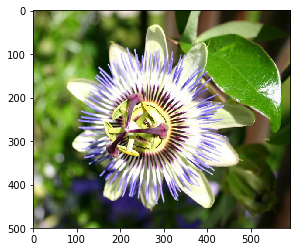

In [42]:
img = '/data/oxford102/jpg/image_00001.jpg'
image_array = preprocess_img(img)
predict(image_array)